# Interpolation of Cloud Atmosphere using scipy.interpolate.griddata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.interpolate import griddata
sns.set_style("whitegrid")
# plt.style.use('classic')
# plt.style.use('seaborn-whitegrid')

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [2]:
# "../create_atm/atmospheres/cloud_atm_1-2.csv"
# "../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv"
df_cloud = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv", header = None, index_col = 0) 
N_cloud = int(df_cloud.shape[1]/2)

In [3]:
dft_cloud = df_cloud.T

In [4]:
effr_cloud = [4,8,10,16,20,32] 

In [5]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

N_dTau_cloud = len(dTau_range_cloud)

# print(dTau_range_cloud)

In [6]:
df_index_log = np.log(df_cloud.index)
# df_index_log

## Interpolating using griddata routine

### Effective Radius interpolation

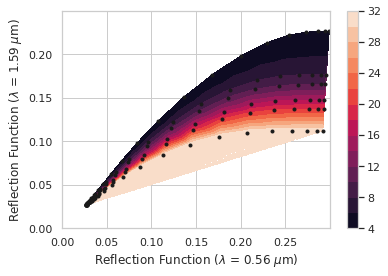

In [7]:
dft_numpy = dft_cloud.to_numpy()

x_effr = dft_numpy[0]
for i in range(N_cloud-1):
    x_effr = np.concatenate([x_effr, dft_numpy[i+1]])

y_effr = dft_numpy[N_cloud]
for i in range(N_cloud-1):
    y_effr = np.concatenate([y_effr, dft_numpy[i+1+N_cloud]])

z_effr = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])
z_effr = np.log10(z_effr)

xi_effr = np.arange(0,0.3,0.0001)
yi_effr = np.arange(0,0.25,0.0001)
xi_effr,yi_effr = np.meshgrid(xi_effr,yi_effr)

zi_effr = griddata((x_effr,y_effr),z_effr,(xi_effr,yi_effr),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_effr,y_effr,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_effr, yi_effr, 10**zi_effr, levels=14)

plt.colorbar(cntr1)
plt.show()

## Optical Depth Interpolation

In [158]:
# df_numpy = df_cloud.to_numpy()

# x_opd = df_numpy[0][0:N_cloud]
# for i in range(N_dTau_cloud-1):
#     x_opd = np.concatenate([x_opd, df_numpy[i+1][0:N_cloud]])

# y_opd = df_numpy[0][N_cloud:2*N_cloud]
# for i in range(N_dTau_cloud-1):
#     y_opd = np.concatenate([y_opd, df_numpy[i+1][N_cloud:2*N_cloud]])

# z_opd = np.ones(N_cloud)*df_cloud.index[0]
# for i in range(N_dTau_cloud-1):
#     z_opd = np.concatenate([z_opd, np.ones(N_cloud)*df_cloud.index[i+1]])

# z_opd = np.log10(z_opd)

# xi_opd = np.arange(0,0.3,0.0001)
# yi_opd = np.arange(0,0.25,0.0001)
# xi_opd,yi_opd = np.meshgrid(xi_opd,yi_opd)

# zi_opd = griddata((x_opd,y_opd),z_opd,(xi_opd,yi_opd),method='linear')

# # plot
# fig = plt.figure()
# ax = fig.add_subplot(111)
# #plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
# plt.plot(x_opd,y_opd,'k.')
# plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
# cntr1 = ax.contourf(xi_opd, yi_opd, 10**zi_opd, levels=14)

# plt.colorbar(cntr1)
# plt.show()

# Investigating Aerosol Above Cloud

In [9]:
# "../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv"
# "../create_atm/atmospheres/aerosol_cloud_atm_0_0.01.csv"
# df_cloud_0 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

In [10]:
# df_70 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv", header = None, index_col = 0)
# df_76 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.1.csv", header = None, index_col = 0)
# df_77 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.1.csv", header = None, index_col = 0)
# df_79 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

> smoke aerosol

In [177]:
df_79_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.02.csv", header = None, index_col = 0)
df_79_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.04.csv", header = None, index_col = 0)
df_79_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.06.csv", header = None, index_col = 0)
df_79_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.08.csv", header = None, index_col = 0)
df_79_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

In [178]:
## averaged noise in 0.55 micron channel is 2.4%
## averaged noise in 1.6 micron channel is 3.2%

noise_v = 0.024
noise_ir = 0.032

# x_err_70 = dft_70_numpy[1]* noise_v
# y_err_70 = dft_70_numpy[1+N_cloud]* noise_ir

x_err_cloud = dft_numpy[1] * noise_v
y_err_cloud = dft_numpy[1+N_cloud] * noise_ir

In [179]:
# plt.plot(df_70[2+1], df_70[2+1+N_cloud])
# plt.plot(df_76[2+1], df_76[2+1+N_cloud])
# plt.plot(df_77[2+1], df_77[2+1+N_cloud])
# plt.plot(df_79[2+1], df_79[2+1+N_cloud])


# plt.legend(['Dust (a70)','Clean Maritime (a76)','Dirty Maritime (a77)','Smoke (a79)'], title='aerosol ($\mu$m)')

# for i in range(N_cloud):
#     if i == 2:
#         plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=2, capthick=1, ecolor='black') # , linestyle = 'dashed'
#     else:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], 'k', linestyle = 'dashed')
    
# #plt.legend(effr_cloud, title='effective radius ($\mu$m)')
# plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
# plt.show()

In [180]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

print(dTau_range_cloud)

[0.125, 0.1767766952966369, 0.25, 0.3535533905932738, 0.5, 0.7071067811865476, 1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.31370849898476, 16.0, 22.62741699796952, 32.0, 45.254833995939045, 64.0, 90.50966799187808, 128.0]


In [181]:
effr_aerosol = [0.02,0.04,0.06,0.08,0.1]

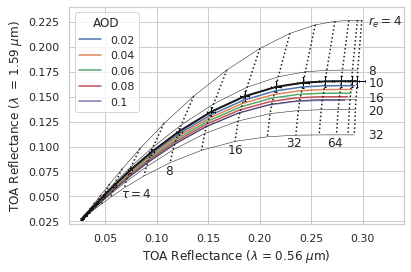

In [231]:
fig, ax = plt.subplots()

# plot perturbations
plt.plot(df_79_0p02[2+1], df_79_0p02[2+1+N_cloud])
plt.plot(df_79_0p04[2+1], df_79_0p04[2+1+N_cloud])
plt.plot(df_79_0p06[2+1], df_79_0p06[2+1+N_cloud])
plt.plot(df_79_0p08[2+1], df_79_0p08[2+1+N_cloud])
plt.plot(df_79_0p10[2+1], df_79_0p10[2+1+N_cloud])


# plot grid
## effective radius
N_dTau_cloud = len(dTau_range_cloud)

for i in range(N_cloud):
    if i == 2:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
        plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
    else:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

#plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

## optical depth
for i in range(N_dTau_cloud):
    x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
    y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
    plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# plot details
#plt.title("Smoke (a79)")
plt.legend(effr_aerosol, title='AOD')
# effective radii
plt.text(0.305, 0.221, '$r_{e}=4$')
plt.text(0.305, 0.172, '$8$')
plt.text(0.305, 0.16, '$10$')
plt.text(0.305, 0.145, '$16$')
plt.text(0.305, 0.132, '$20$')
plt.text(0.305, 0.108, '$32$')

# effective radii
plt.text(0.065, 0.049, r'$\tau = 4$')
plt.text(0.108, 0.072, '$8$')
plt.text(0.168, 0.093, '$16$')
plt.text(0.226, 0.1, '$32$')
plt.text(0.265, 0.1, '$64$')


# plot regions
plt.xlim(0.015,0.34)
plt.ylim(0.022,0.24)

fig.savefig('fig_smoke_perturbation_solo.png', bbox_inches='tight')

fig.show()

> other aerosols

In [183]:
# df_70_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.02.csv", header = None, index_col = 0)
# df_70_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.04.csv", header = None, index_col = 0)
# df_70_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.06.csv", header = None, index_col = 0)
# df_70_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.08.csv", header = None, index_col = 0)
# df_70_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv", header = None, index_col = 0)

In [184]:
# df_76_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.02.csv", header = None, index_col = 0)
# df_76_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.04.csv", header = None, index_col = 0)
# df_76_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.06.csv", header = None, index_col = 0)
# df_76_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.08.csv", header = None, index_col = 0)
# df_76_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.1.csv", header = None, index_col = 0)

In [185]:
# df_77_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.02.csv", header = None, index_col = 0)
# df_77_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.04.csv", header = None, index_col = 0)
# df_77_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.06.csv", header = None, index_col = 0)
# df_77_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.08.csv", header = None, index_col = 0)
# df_77_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.1.csv", header = None, index_col = 0)

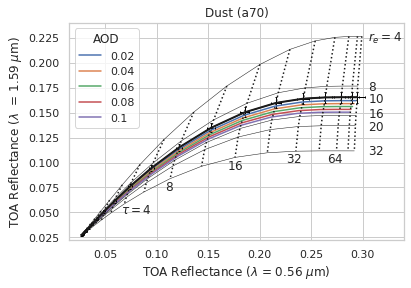

In [214]:
# fig, ax = plt.subplots()

# # plot perturbations
# plt.plot(df_70_0p02[2+1], df_70_0p02[2+1+N_cloud])
# plt.plot(df_70_0p04[2+1], df_70_0p04[2+1+N_cloud])
# plt.plot(df_70_0p06[2+1], df_70_0p06[2+1+N_cloud])
# plt.plot(df_70_0p08[2+1], df_70_0p08[2+1+N_cloud])
# plt.plot(df_70_0p10[2+1], df_70_0p10[2+1+N_cloud])


# # plot grid
# ## effective radius
# N_dTau_cloud = len(dTau_range_cloud)

# for i in range(N_cloud):
#     if i == 2:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
#         plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
#     else:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# # plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# # plt.plot(df_cloud_atm[6], df_cloud_atm[12])

# #plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
# plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

# ## optical depth
# for i in range(N_dTau_cloud):
#     x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
#     y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
#     plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# # plot details
# plt.title("Dust (a70)")
# plt.legend(effr_aerosol, title='AOD')
# # effective radii
# plt.text(0.305, 0.221, '$r_{e}=4$')
# plt.text(0.305, 0.172, '$8$')
# plt.text(0.305, 0.16, '$10$')
# plt.text(0.305, 0.145, '$16$')
# plt.text(0.305, 0.132, '$20$')
# plt.text(0.305, 0.108, '$32$')

# # effective radii
# plt.text(0.065, 0.049, r'$\tau = 4$')
# plt.text(0.108, 0.072, '$8$')
# plt.text(0.168, 0.093, '$16$')
# plt.text(0.226, 0.1, '$32$')
# plt.text(0.265, 0.1, '$64$')


# # plot regions
# plt.xlim(0.015,0.34)
# plt.ylim(0.022,0.24)

# #plt.tight_layout()

# fig.savefig('fig_dust_perturbation.png', bbox_inches='tight')


# fig.show()

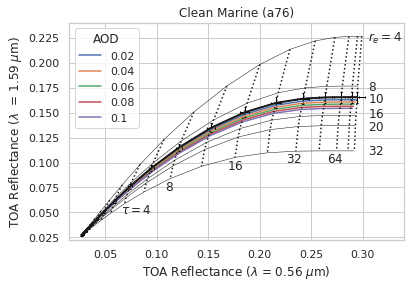

In [215]:
# fig, ax = plt.subplots()

# # plot perturbations
# plt.plot(df_76_0p02[2+1], df_76_0p02[2+1+N_cloud])
# plt.plot(df_76_0p04[2+1], df_76_0p04[2+1+N_cloud])
# plt.plot(df_76_0p06[2+1], df_76_0p06[2+1+N_cloud])
# plt.plot(df_76_0p08[2+1], df_76_0p08[2+1+N_cloud])
# plt.plot(df_76_0p10[2+1], df_76_0p10[2+1+N_cloud])


# # plot grid
# ## effective radius
# N_dTau_cloud = len(dTau_range_cloud)

# for i in range(N_cloud):
#     if i == 2:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
#         plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
#     else:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# # plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# # plt.plot(df_cloud_atm[6], df_cloud_atm[12])

# #plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
# plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

# ## optical depth
# for i in range(N_dTau_cloud):
#     x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
#     y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
#     plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# # plot details
# plt.title("Clean Marine (a76)")
# plt.legend(effr_aerosol, title='AOD')
# # effective radii
# plt.text(0.305, 0.221, '$r_{e}=4$')
# plt.text(0.305, 0.172, '$8$')
# plt.text(0.305, 0.16, '$10$')
# plt.text(0.305, 0.145, '$16$')
# plt.text(0.305, 0.132, '$20$')
# plt.text(0.305, 0.108, '$32$')

# # effective radii
# plt.text(0.065, 0.049, r'$\tau = 4$')
# plt.text(0.108, 0.072, '$8$')
# plt.text(0.168, 0.093, '$16$')
# plt.text(0.226, 0.1, '$32$')
# plt.text(0.265, 0.1, '$64$')


# # plot regions
# plt.xlim(0.015,0.34)
# plt.ylim(0.022,0.24)

# fig.savefig('fig_cleanmarine_perturbation.png', bbox_inches='tight')

# fig.show()

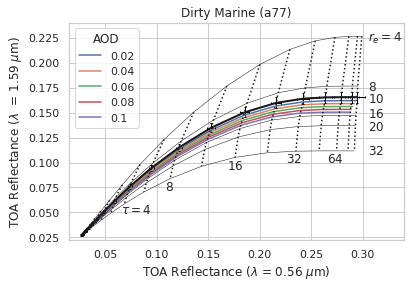

In [216]:
# fig, ax = plt.subplots()

# # plot perturbations
# plt.plot(df_77_0p02[2+1], df_77_0p02[2+1+N_cloud])
# plt.plot(df_77_0p04[2+1], df_77_0p04[2+1+N_cloud])
# plt.plot(df_77_0p06[2+1], df_77_0p06[2+1+N_cloud])
# plt.plot(df_77_0p08[2+1], df_77_0p08[2+1+N_cloud])
# plt.plot(df_77_0p10[2+1], df_77_0p10[2+1+N_cloud])


# # plot grid
# ## effective radius
# N_dTau_cloud = len(dTau_range_cloud)

# for i in range(N_cloud):
#     if i == 2:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
#         plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
#     else:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# # plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# # plt.plot(df_cloud_atm[6], df_cloud_atm[12])

# #plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
# plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

# ## optical depth
# for i in range(N_dTau_cloud):
#     x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
#     y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
#     plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# # plot details
# plt.title("Dirty Marine (a77)")
# plt.legend(effr_aerosol, title='AOD')
# # effective radii
# plt.text(0.305, 0.221, '$r_{e}=4$')
# plt.text(0.305, 0.172, '$8$')
# plt.text(0.305, 0.16, '$10$')
# plt.text(0.305, 0.145, '$16$')
# plt.text(0.305, 0.132, '$20$')
# plt.text(0.305, 0.108, '$32$')

# # effective radii
# plt.text(0.065, 0.049, r'$\tau = 4$')
# plt.text(0.108, 0.072, '$8$')
# plt.text(0.168, 0.093, '$16$')
# plt.text(0.226, 0.1, '$32$')
# plt.text(0.265, 0.1, '$64$')


# # plot regions
# plt.xlim(0.015,0.34)
# plt.ylim(0.022,0.24)

# fig.savefig('fig_dirtymarine_perturbation.png', bbox_inches='tight')

# fig.show()

> focus on smoke aerosol

In [193]:
df_79_0p02[2+1]

0
0.125000      0.027279
0.176777      0.027899
0.250000      0.028763
0.353553      0.029986
0.500000      0.031706
0.707107      0.034122
1.000000      0.037523
1.414214      0.042351
2.000000      0.049297
2.828427      0.059395
4.000000      0.074059
5.656854      0.094548
8.000000      0.121088
11.313708     0.151966
16.000000     0.184073
22.627417     0.214337
32.000000     0.240602
45.254834     0.261665
64.000000     0.277072
90.509668     0.287015
128.000000    0.292331
Name: 3, dtype: float64

In [194]:
N_dTau_cloud

21

In [195]:
i = 20

print(df_79_0p02[2+1][dTau_range_cloud[i]])
print(df_79_0p02[2+1+N_cloud][dTau_range_cloud[i]])

0.29233137
0.16098301


In [196]:
10**griddata((x_effr,y_effr),z_effr,(0.2,0.15),method='linear')

11.63685012711452

In [197]:
COD_retrieved_0p02 =[]
COD_retrieved_0p04 =[]
COD_retrieved_0p06 =[]
COD_retrieved_0p08 =[]
COD_retrieved_0p10 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_0p02.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p02[2+1][dTau_range_cloud[i]],df_79_0p02[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p04.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p04[2+1][dTau_range_cloud[i]],df_79_0p04[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p06.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p06[2+1][dTau_range_cloud[i]],df_79_0p06[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p08.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p08[2+1][dTau_range_cloud[i]],df_79_0p08[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p10.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p10[2+1][dTau_range_cloud[i]],df_79_0p10[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))

In [198]:
# plt.plot(dTau_range_cloud, COD_retrieved_0p02)
# plt.plot(dTau_range_cloud, COD_retrieved_0p04)
# plt.plot(dTau_range_cloud, COD_retrieved_0p06)
# plt.plot(dTau_range_cloud, COD_retrieved_0p08)
# plt.plot(dTau_range_cloud, COD_retrieved_0p10)

# plt.xlabel('COD')
# plt.ylabel('retrieved CER')
# plt.legend(effr_aerosol, title='AOD')

In [199]:
#plt.plot(df_cloud[2+1], df_cloud[2+1+N_cloud], color = 'k', linewidth = 2)

In [200]:
# for i in range(N_dTau_cloud):
#     print(df_cloud[2+1][dTau_range_cloud[i]]*(1+noise_v))
#     print(df_cloud[2+1+N_cloud][dTau_range_cloud[i]]*(1-noise_ir))

In [201]:
COD_retrieved_error =[]

for i in range(N_dTau_cloud):
    COD_retrieved_error.append(10**griddata((x_effr,y_effr),z_effr,(df_cloud[2+1][dTau_range_cloud[i]]*(1+noise_v),df_cloud[2+1+N_cloud][dTau_range_cloud[i]]*(1-noise_ir)),method='linear'))
#     print(df_cloud[2+1][dTau_range_cloud[i]]*(1+noise_v))
#     print(df_cloud[2+1+N_cloud][dTau_range_cloud[i]]*(1-noise_ir))

In [202]:
COD_retrieved_error

[nan,
 nan,
 32.00000000000001,
 31.99999999999999,
 32.00000000000001,
 23.172484872053897,
 18.884596251174347,
 16.589677248805376,
 15.037253736436694,
 13.972117038400402,
 13.234252797032747,
 12.700859274228193,
 12.269385206124637,
 12.289313112479258,
 11.933903012000107,
 11.776204930679066,
 11.577534303269529,
 11.494223063494468,
 11.47230315890624,
 nan,
 nan]

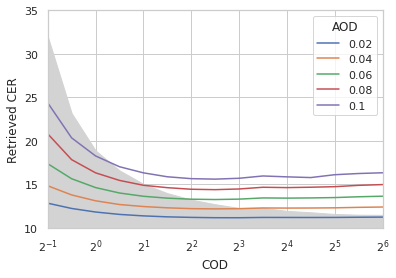

In [239]:
fig, ax = plt.subplots()

plt.fill_between(dTau_range_cloud, COD_retrieved_error, color = 'lightgrey', y2 =10)

plt.plot(dTau_range_cloud, COD_retrieved_0p02)
plt.plot(dTau_range_cloud, COD_retrieved_0p04)
plt.plot(dTau_range_cloud, COD_retrieved_0p06)
plt.plot(dTau_range_cloud, COD_retrieved_0p08)
plt.plot(dTau_range_cloud, COD_retrieved_0p10)

plt.xlabel('COD')
plt.ylabel('Retrieved CER')
plt.legend(effr_aerosol, title='AOD')

#plot regions
plt.xlim(0.5,64)
plt.ylim(10,35)


plt.xscale('log', base = 2)


fig.savefig('fig_smoke_perturbation_CER10.png', bbox_inches='tight')

In [218]:
COD_retrieved_0p02_8 =[]
COD_retrieved_0p04_8 =[]
COD_retrieved_0p06_8 =[]
COD_retrieved_0p08_8 =[]
COD_retrieved_0p10_8 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_0p02_8.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p02[1+1][dTau_range_cloud[i]],df_79_0p02[1+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p04_8.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p04[1+1][dTau_range_cloud[i]],df_79_0p04[1+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p06_8.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p06[1+1][dTau_range_cloud[i]],df_79_0p06[1+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p08_8.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p08[1+1][dTau_range_cloud[i]],df_79_0p08[1+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p10_8.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p10[1+1][dTau_range_cloud[i]],df_79_0p10[1+1+N_cloud][dTau_range_cloud[i]]),method='linear'))

In [219]:
COD_retrieved_error_8 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_error_8.append(10**griddata((x_effr,y_effr),z_effr,(df_cloud[1+1][dTau_range_cloud[i]]*(1+noise_v),df_cloud[1+1+N_cloud][dTau_range_cloud[i]]*(1-noise_ir)),method='linear'))

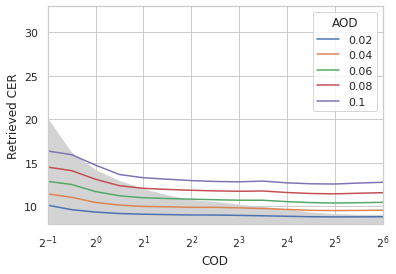

In [240]:
fig, ax = plt.subplots()

plt.fill_between(dTau_range_cloud, COD_retrieved_error_8, color = 'lightgrey', y2 =8)

plt.plot(dTau_range_cloud, COD_retrieved_0p02_8)
plt.plot(dTau_range_cloud, COD_retrieved_0p04_8)
plt.plot(dTau_range_cloud, COD_retrieved_0p06_8)
plt.plot(dTau_range_cloud, COD_retrieved_0p08_8)
plt.plot(dTau_range_cloud, COD_retrieved_0p10_8)

plt.xlabel('COD')
plt.ylabel('Retrieved CER')
plt.legend(effr_aerosol, title='AOD')

#plot regions
plt.xlim(0.5,64)
plt.ylim(8,33)


plt.xscale('log', base = 2)


fig.savefig('fig_smoke_perturbation_CER8.png', bbox_inches='tight')

In [224]:
COD_retrieved_0p02_16 =[]
COD_retrieved_0p04_16 =[]
COD_retrieved_0p06_16 =[]
COD_retrieved_0p08_16 =[]
COD_retrieved_0p10_16 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_0p02_16.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p02[3+1][dTau_range_cloud[i]],df_79_0p02[3+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p04_16.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p04[3+1][dTau_range_cloud[i]],df_79_0p04[3+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p06_16.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p06[3+1][dTau_range_cloud[i]],df_79_0p06[3+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p08_16.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p08[3+1][dTau_range_cloud[i]],df_79_0p08[3+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p10_16.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p10[3+1][dTau_range_cloud[i]],df_79_0p10[3+1+N_cloud][dTau_range_cloud[i]]),method='linear'))

In [225]:
COD_retrieved_error_16 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_error_16.append(10**griddata((x_effr,y_effr),z_effr,(df_cloud[3+1][dTau_range_cloud[i]]*(1+noise_v),df_cloud[3+1+N_cloud][dTau_range_cloud[i]]*(1-noise_ir)),method='linear'))

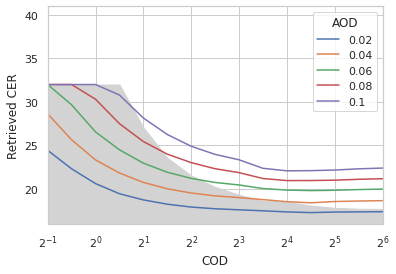

In [241]:
fig, ax = plt.subplots()

plt.fill_between(dTau_range_cloud, COD_retrieved_error_16, color = 'lightgrey', y2 =16)

plt.plot(dTau_range_cloud, COD_retrieved_0p02_16)
plt.plot(dTau_range_cloud, COD_retrieved_0p04_16)
plt.plot(dTau_range_cloud, COD_retrieved_0p06_16)
plt.plot(dTau_range_cloud, COD_retrieved_0p08_16)
plt.plot(dTau_range_cloud, COD_retrieved_0p10_16)

plt.xlabel('COD')
plt.ylabel('Retrieved CER')
plt.legend(effr_aerosol, title='AOD')

#plot regions
plt.xlim(0.5,64)
plt.ylim(16,41)


plt.xscale('log', base = 2)


fig.savefig('fig_smoke_perturbation_CER16.png', bbox_inches='tight')

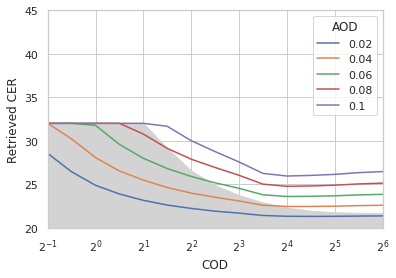

In [242]:
COD_retrieved_0p02_20 =[]
COD_retrieved_0p04_20 =[]
COD_retrieved_0p06_20 =[]
COD_retrieved_0p08_20 =[]
COD_retrieved_0p10_20 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_0p02_20.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p02[4+1][dTau_range_cloud[i]],df_79_0p02[4+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p04_20.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p04[4+1][dTau_range_cloud[i]],df_79_0p04[4+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p06_20.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p06[4+1][dTau_range_cloud[i]],df_79_0p06[4+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p08_20.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p08[4+1][dTau_range_cloud[i]],df_79_0p08[4+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p10_20.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p10[4+1][dTau_range_cloud[i]],df_79_0p10[4+1+N_cloud][dTau_range_cloud[i]]),method='linear'))

COD_retrieved_error_20 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_error_20.append(10**griddata((x_effr,y_effr),z_effr,(df_cloud[4+1][dTau_range_cloud[i]]*(1+noise_v),df_cloud[4+1+N_cloud][dTau_range_cloud[i]]*(1-noise_ir)),method='linear'))

fig, ax = plt.subplots()

plt.fill_between(dTau_range_cloud, COD_retrieved_error_20, color = 'lightgrey', y2 =20)

plt.plot(dTau_range_cloud, COD_retrieved_0p02_20)
plt.plot(dTau_range_cloud, COD_retrieved_0p04_20)
plt.plot(dTau_range_cloud, COD_retrieved_0p06_20)
plt.plot(dTau_range_cloud, COD_retrieved_0p08_20)
plt.plot(dTau_range_cloud, COD_retrieved_0p10_20)

plt.xlabel('COD')
plt.ylabel('Retrieved CER')
plt.legend(effr_aerosol, title='AOD')

#plot regions
plt.xlim(0.5,64)
plt.ylim(20,45)


plt.xscale('log', base = 2)


fig.savefig('fig_smoke_perturbation_CER20.png', bbox_inches='tight')